### Définir les couches du modèle (Conv2D, MaxPooling2D, Dropout, Dense).

Pour construire le modèle CNN:

- on a utilisé 3 blocs convolutionnels avec activation ReLU, suivis de couches de pooling et de dropout spatial afin d’extraire les caractéristiques importantes et de réduire le surapprentissage.

- Les cartes de caractéristiques obtenues sont aplaties et transmises à des couches entièrement connectées, avec un dropout supplémentaire pour limiter le surapprentissage.

- La couche de sortie génère les probabilités finales pour la classification, et le modèle est entraîné avec l’optimiseur Adam en suivant une fonction de perte adaptée, la précision servant de métrique pour évaluer ses performances.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, SpatialDropout2D

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(SpatialDropout2D(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(SpatialDropout2D(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(SpatialDropout2D(0.25))

model.add(Flatten())

model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))


c:\Users\anass\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Choisir les fonctions d’activation appropriées

Pour les couches convolutionnelles, on a choisi l’activation ReLU afin d’introduire de la non-linéarité et de permettre au réseau de modéliser des relations complexes tout en évitant le problème du gradient nul. Pour les couches cachées entièrement connectées, l’activation sigmoïde a été utilisée afin de normaliser les sorties entre 0 et 1, facilitant la convergence du modèle. Enfin, la couche de sortie utilise softmax pour produire des probabilités normalisées sur toutes les classes, ce qui permet d’effectuer une classification multi-classes.

### Vérifier la structure avec model.summary() et plot_model().

In [2]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d               │ (None, 111, 111, 32)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_1             │ (None, 54, 54, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_2             │ (None, 26, 26, 128)    │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='../models/model.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


### Déterminer les hyperparamètres: la taille de batch, le nombre d’époques et le taux d’apprentissage.

La méthode compile() configure le processus d’apprentissage du modèle. Elle définit l’optimiseur (Adam), la fonction de perte (categorical crossentropy) et la métrique d’évaluation (accuracy), permettant ainsi de contrôler la manière dont le modèle apprend et mesure ses performances.

In [4]:
from tensorflow.keras.optimizers import Adam

batch_size = 32
epochs = 40
learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### Chargement de données

In [5]:
import numpy as np
import os

dir = os.getcwd() + "/../data/processed/equilibrated_data/"

X = np.load(dir + "normalized_images.npy")
y = np.load(dir + "one_hot_labels.npy")

### Split data

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Entrainement du modéle

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import time

dir = os.getcwd() + "/../models/"

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
)

checkpoint = ModelCheckpoint(
    filepath= dir + 'model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
)

start_time = time.time()

history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[checkpoint, early_stop],
)

end_time = time.time()

training_time = end_time - start_time

Epoch 1/40
180/180 ━━━━━━━━━━━━━━━━━━━━ 62s 329ms/step - accuracy: 0.5903 - loss: 0.9471 - val_accuracy: 0.7422 - val_loss: 0.6045
Epoch 2/40
180/180 ━━━━━━━━━━━━━━━━━━━━ 59s 329ms/step - accuracy: 0.7510 - loss: 0.6097 - val_accuracy: 0.7906 - val_loss: 0.4877
Epoch 3/40
180/180 ━━━━━━━━━━━━━━━━━━━━ 83s 333ms/step - accuracy: 0.7997 - loss: 0.5008 - val_accuracy: 0.8000 - val_loss: 0.4687
Epoch 4/40
180/180 ━━━━━━━━━━━━━━━━━━━━ 58s 324ms/step - accuracy: 0.8406 - loss: 0.4203 - val_accuracy: 0.8625 - val_loss: 0.4025
Epoch 5/40
180/180 ━━━━━━━━━━━━━━━━━━━━ 60s 331ms/step - accuracy: 0.8681 - loss: 0.3528 - val_accuracy: 0.8687 - val_loss: 0.3482
Epoch 6/40
180/180 ━━━━━━━━━━━━━━━━━━━━ 58s 322ms/step - accuracy: 0.8828 - loss: 0.3073 - val_accuracy: 0.8500 - val_loss: 0.3600
Epoch 7/40
180/180 ━━━━━━━━━━━━━━━━━━━━ 68s 378ms/step - accuracy: 0.9102 - loss: 0.2492 - val_accuracy: 0.8813 - val_loss: 0.3293
Epoch 8/40
180/180 ━━━━━━━━━━━━━━━━━━━━ 60s 333ms/step - accuracy: 0.9170 - loss: 0

### Évaluer les performances sur l’ensemble de test.
L’évaluation sur le jeu de test permet de mesurer les performances finales du modèle sur des données totalement inédites, garantissant une estimation fiable de sa capacité de généralisation.

In [ ]:
from tensorflow.keras.models import load_model

dir = os.getcwd() + "/../models/"

best_model = load_model(dir + 'model.keras')

loss, accuracy = best_model.evaluate(X_test, y_test, verbose=1)

print(f"Loss sur le jeu de test : {loss:.4f}")
print(f"Accuracy sur le jeu de test : {accuracy:.4f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9050 - loss: 0.2727
Loss sur le jeu de test : 0.2727
Accuracy sur le jeu de test : 0.9050


### Visualiser les courbes d’apprentissage (accuracy / loss).

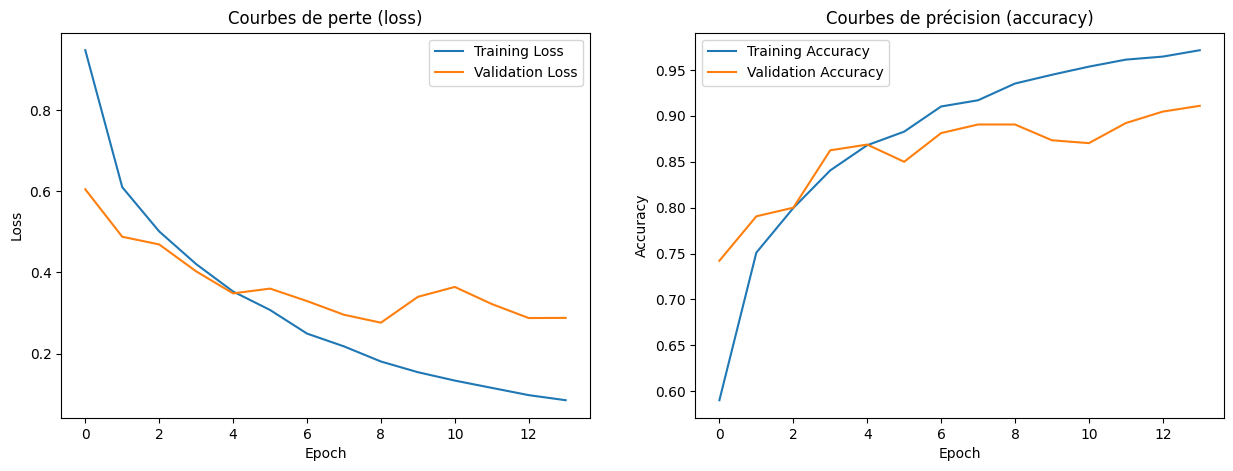

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbes de perte (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Courbes de précision (Accuracy)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Générer une matrice de confusion.

50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step


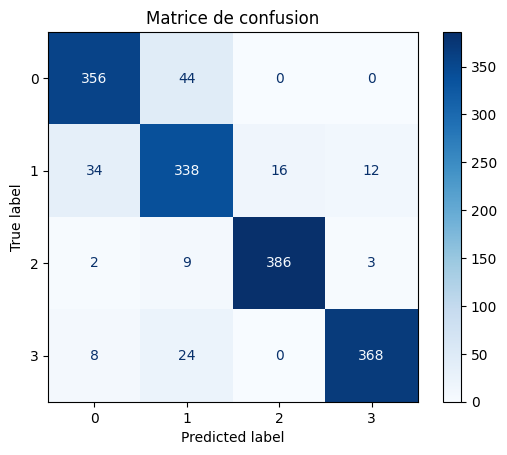

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

y_pred = best_model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion")
plt.show()
